<a href="https://colab.research.google.com/github/lorenzo-arcioni/Applied-Mathematics-Hub/blob/main/Exploratory Data Analysis/Analisi_California.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi esplorativa California Housing

In questo notebook, analizziamo il dataset `California Housing` fornito da [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Prima di realizzare un modello predittivo di qualunque genere, è bene effettuare un'analisi esplorativa del dataset, in modo da avere tutte le informazioni necessarie per realizzare e validare il modello correttamente.

## Descrizione dataset California Housing

Il dataset "California Housing" è un insieme di dati ampiamente utilizzato per l'analisi dei prezzi delle abitazioni in California. Questo dataset è originariamente stato creato dal censimento del 1990 e contiene informazioni sulle caratteristiche demografiche e sulle proprietà delle case in diverse località della California.

Il dataset contiene otto features misurate per ciascun blocco abitativo:

1. **MedInc**: Reddito medio di una famiglia nel blocco in $10 000.
2. **HouseAge**: Età media delle case nel blocco.
3. **AveRooms**: Numero medio di stanze per abitazione.
4. **AveBedrms**: Numero medio di camere da letto per abitazione.
5. **Population**: Popolazione del blocco.
6. **AveOccup**: Numero medio di abitanti per abitazione.
7. **Latitude**: Latitudine della località.
8. **Longitude**: Longitudine della località.

E il target (mediana del valore delle case) che è indicato come 
- **MedHouseVal**: Valore mediano delle case nel blocco in $100 000.

![california-housing](Images/california-housing.png)

## Obiettivo

L'obiettivo di oggi è quello di effettuare un'analisi esplorativa del dataset California Housing, per comprendere meglio i fattori che influenzano i prezzi delle abitazioni in California.

## Analisi

### 1. Caricamento dei dati
Prima di tutto, caricheremo il dataset. In questo esempio, utilizzeremo il famoso dataset California Housing fornito dalla libreria `sklearn`. Visualizzeremo anche i dati in un DataFrame per una migliore comprensione.

In [1]:
# Importare le librerie necessarie
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Caricare il dataset California Housing
california = fetch_california_housing()
X = california.data
y = california.target
columns = california.feature_names

# Creare un DataFrame
df = pd.DataFrame(data=X, columns=columns)
df['MedHouseVal'] = y

# Visualizzare le prime righe del DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2. Analisi esplorativa
Nel seguito, effettuiamo un'analisi esplorativa preliminare del dataset, per capire meglio i fattori che influenzano i valori delle case in California.

In [2]:
# Informazioni sul DataFrame
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
# Statistiche descrittive
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

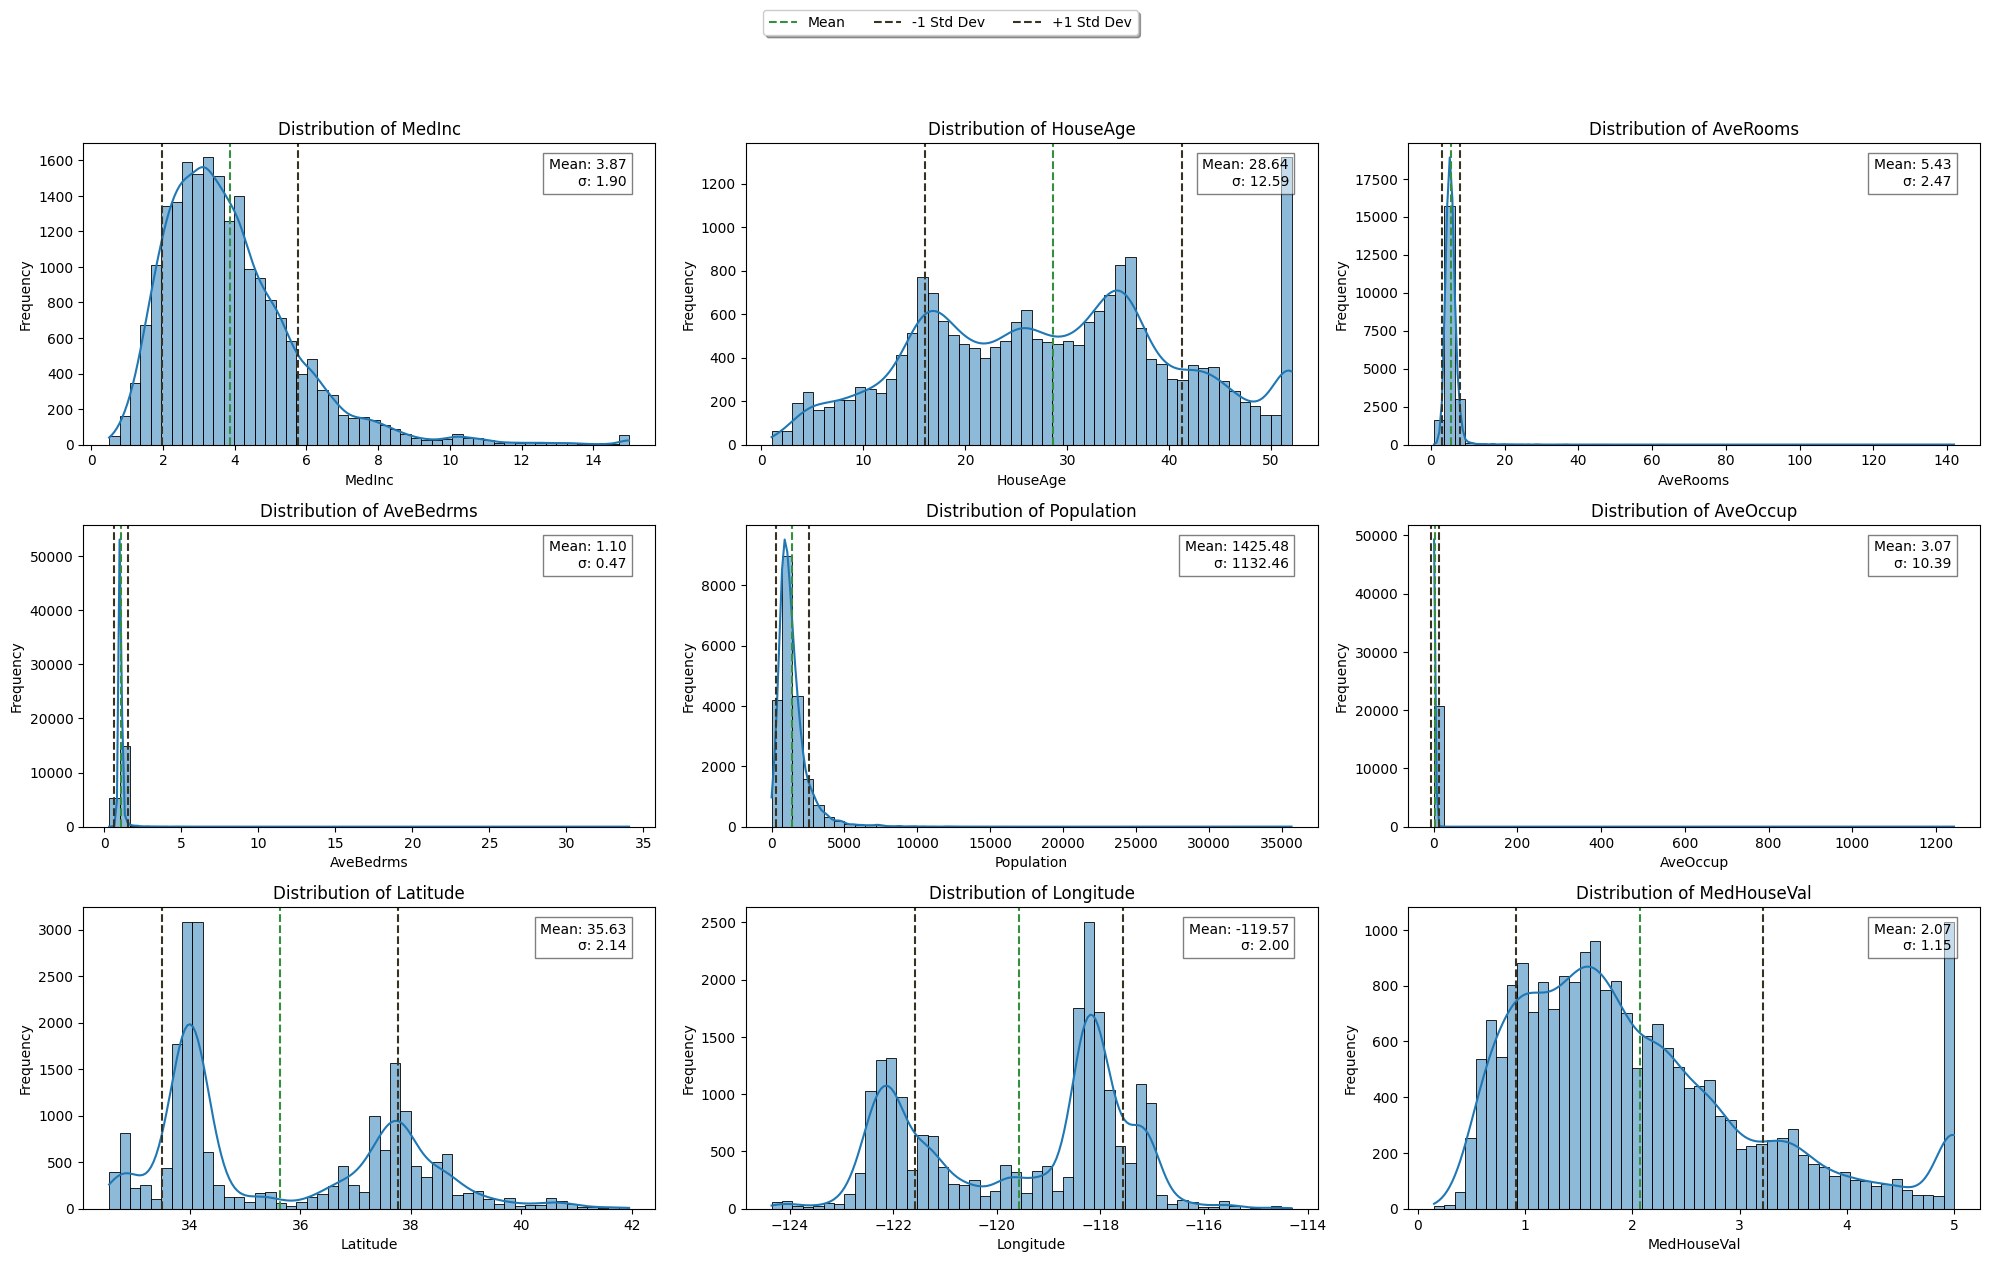

In [5]:

# Plot degli istogrammi per le caratteristiche numeriche
plt.figure(figsize=(20, 15))

for i, feature in enumerate(df.columns):
    plt.subplot(len(df.columns) // 3 + 1, 3, i + 1)
    sns.histplot(df[feature], bins=50, kde=True)
    
    # Calcola media e deviazione standard
    mean = df[feature].mean()
    std = df[feature].std()
    
    # Annotazioni
    plt.axvline(mean, color='#358f3f', linestyle='--', label='Mean')
    plt.axvline(mean - std, color='#383222', linestyle='--', label='-1 Std Dev')
    plt.axvline(mean + std, color='#383222', linestyle='--', label='+1 Std Dev')
    
    # Aggiungi testo con media e deviazione standard
    plt.text(0.95, 0.95, f'Mean: {mean:.2f}\nσ: {std:.2f}', 
             ha='right', va='top', 
             transform=plt.gca().transAxes, 
             fontsize=10, 
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(-0.8, 4), fancybox=True, shadow=True, ncol=3)
plt.show()

In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
df[df["AveOccup"] > 1000]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


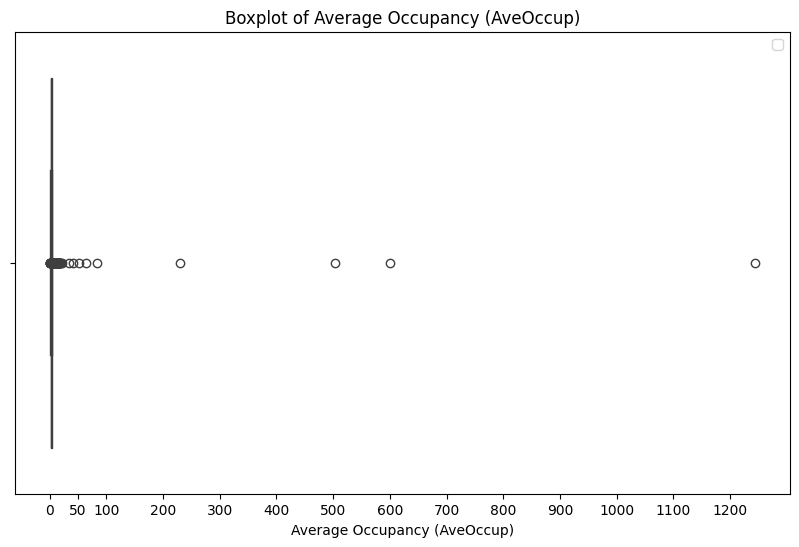

In [9]:
# Crea il boxplot per AveOccup
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AveOccup'])

# Imposta le etichette dell'asse x
plt.xticks(ticks=[0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200],
           labels=['0', '50', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000', '1100', '1200'])

# Aggiungi titolo e etichette degli assi
plt.title('Boxplot of Average Occupancy (AveOccup)')
plt.xlabel('Average Occupancy (AveOccup)')
plt.legend()
plt.show()

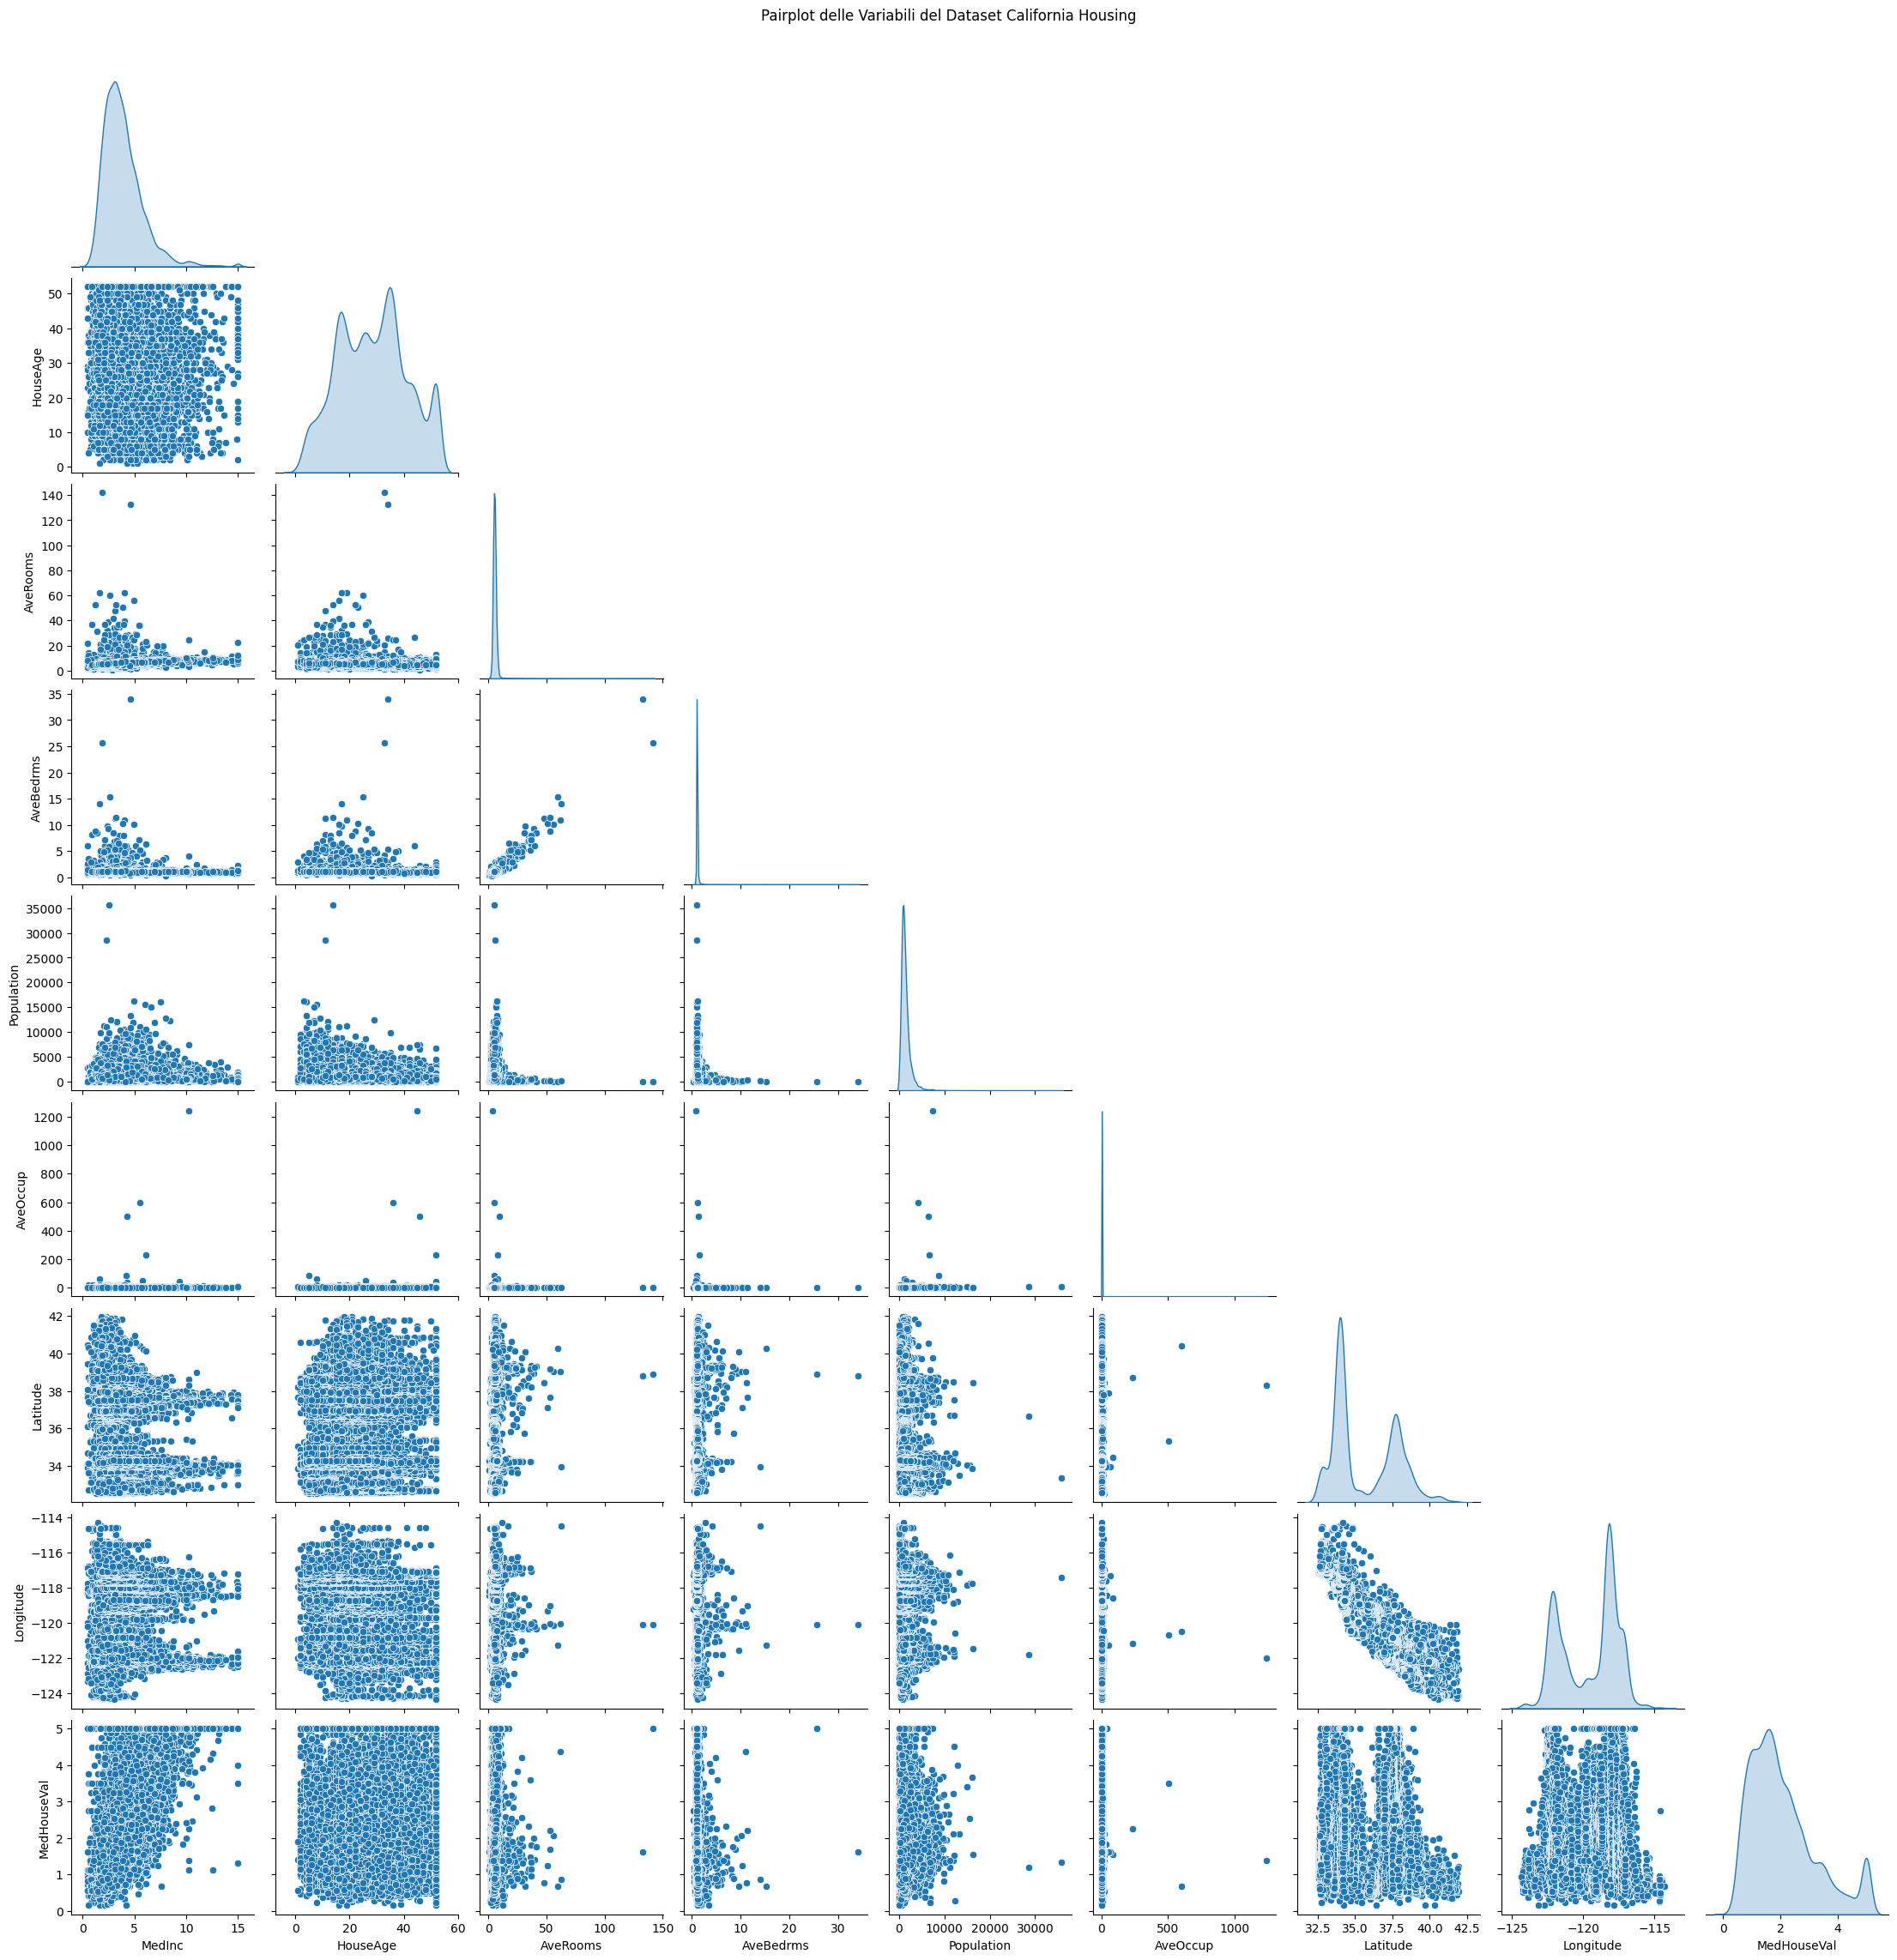

In [10]:
# Crea un pairplot di tutte le variabili
sns.pairplot(df, corner=True, diag_kind='kde')
plt.suptitle('Pairplot delle Variabili del Dataset California Housing', y=1.02)
plt.show()

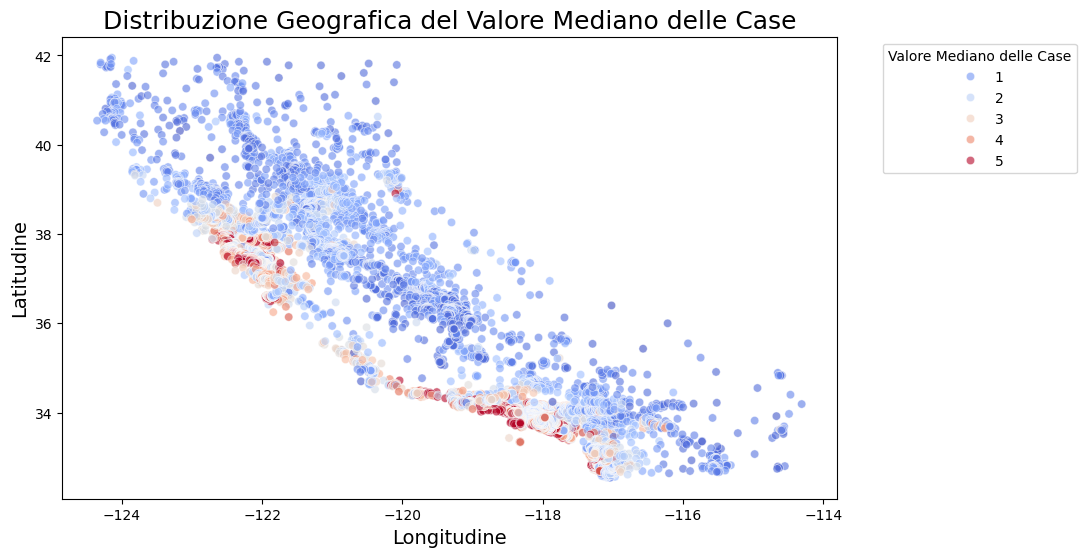

In [12]:
# Relazione tra Latitude e Longitude con MedHouseVal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='MedHouseVal', data=df, palette='coolwarm', alpha=0.6)
plt.title('Distribuzione Geografica del Valore Mediano delle Case', fontsize=18)
plt.xlabel('Longitudine', fontsize=14)
plt.ylabel('Latitudine', fontsize=14)
plt.legend(title='Valore Mediano delle Case', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Se conosci la California, puoi chiaramente vedere l'alta densità nella Bay Area, a Los Angeles, San Diego e nella Central Valley intorno a Sacramento e Fresno. I nostri cervelli sono molto bravi a trovare schemi nelle immagini, ma spesso è necessario giocare con i parametri per far risaltare davvero i pattern importanti.

Ora daremo un'occhiata ai prezzi delle case nel grafico a dispersione qui sotto. Il colore rappresenta il prezzo e il raggio di ciascun cerchio rappresenta la popolazione dei distretti.

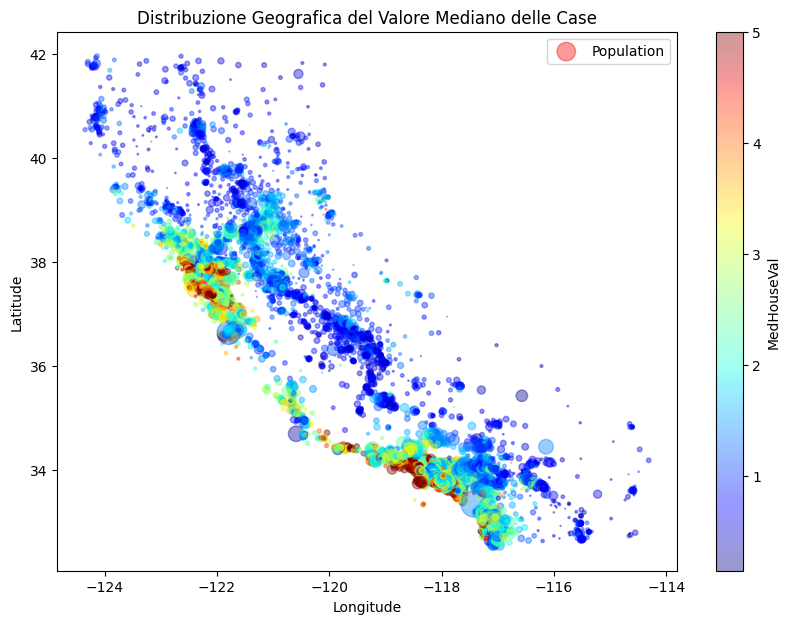

In [ ]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=df["Population"]/100, label="Population", figsize=(10,7),
    c="MedHouseVal", cmap=plt.get_cmap("jet"), colorbar=True, title="Distribuzione Geografica del Valore Mediano delle Case",
    sharex=False)
plt.legend()
plt.show()

Nel grafico a dispersione possiamo vedere che i prezzi delle case sono legati alla posizione (vicino all'oceano) e alla densità di popolazione. Tuttavia, sappiamo che i prezzi delle case nei distretti costieri non sono così alti nella California del Nord, quindi non possiamo formulare questa regola in modo così semplice.

In [ ]:
import folium as folium
from folium import plugins
from folium.plugins import HeatMap

# Crea un mappa Folium
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['Latitude', 'Longitude']]
data = [[row['Latitude'],row['Longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(california_map)
california_map

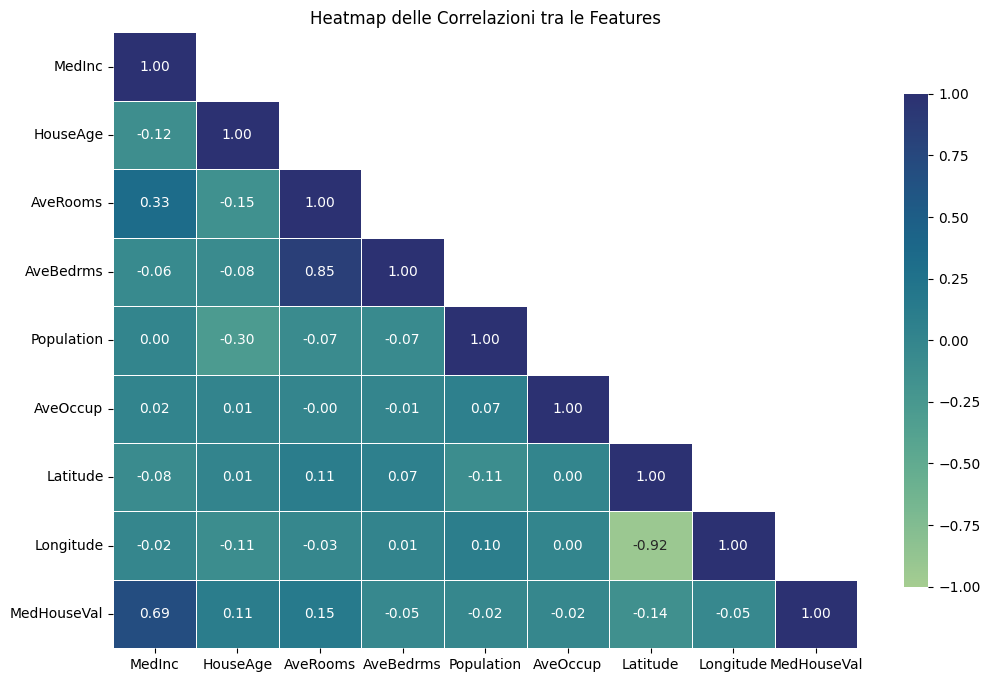

In [ ]:
# Calcola la matrice di correlazione
corr_matrix = df.corr()

# Genera una maschera per il triangolo superiore
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Imposta la dimensione della figura
plt.figure(figsize=(12, 8))

# Crea una heatmap della correlazione con colori desaturati
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='crest', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})

# Titolo e visualizzazione
plt.title('Heatmap delle Correlazioni tra le Features')
plt.show()